In [0]:
#Dataset is in the google drive

# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = False)

# setting a root_dir and base_dir
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
#updating fastai library
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
#path to the train folder in the dataset
path = Path(base_dir + 'Indian-Currency-Dataset/train')

In [0]:
#There are "test" and "train" folder inside the "Indian-Currency-Dataset" folder
Path(base_dir + 'Indian-Currency-Dataset').ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/train')]

## View data

In [0]:
# path to the test folder
path_test = Path(base_dir + 'Indian-Currency-Dataset/test')

In [0]:
no_of_none_image = len((path/"none").ls())
no_of_5_image = len((path/"5").ls())
no_of_10_image = len((path/"10").ls())
no_of_20_image = len((path/"20").ls())
no_of_50_image = len((path/"50").ls())
no_of_100_image = len((path/"100").ls())
no_of_200_image = len((path/"200").ls())
no_of_500_image = len((path/"500").ls())
no_of_2000_image = len((path/"2000").ls())

In [0]:
print(f"No. of 'None' image is {no_of_none_image}")
print(f"No. of '5' image is {no_of_5_image}")
print(f"No. of '10' image is {no_of_10_image}")
print(f"No. of '20' image is {no_of_20_image}")
print(f"No. of '50' image is {no_of_50_image}")
print(f"No. of '100' image is {no_of_100_image}")
print(f"No. of '200' image is {no_of_200_image}")
print(f"No. of '500' image is {no_of_500_image}")
print(f"No. of '2000' image is {no_of_2000_image}")

No. of 'None' image is 326
No. of '5' image is 411
No. of '10' image is 209
No. of '20' image is 239
No. of '50' image is 583
No. of '100' image is 406
No. of '200' image is 185
No. of '500' image is 115
No. of '2000' image is 16


In [0]:
tfms = get_transforms(do_flip = False, max_rotate = 180.0)

In [0]:
#Creating a ImageDataBunch object, it bundles training images, validation images, and testing images all in one object.
# Also, "size=224" will make all images of same size (3, 224, 224).
# "valid_pct = 0.2" will split training data into training and vaid data with 80, 20 propotion.
#normalize(imagenet_stats) will normalize images

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
          ds_tfms=tfms, size=448, num_workers=4).normalize(imagenet_stats)

data

ImageDataBunch;

Train: LabelList (1136 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
500,500,500,500,500
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/train;

Valid: LabelList (283 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
500,50,10,200,100
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/train;

Test: None

In [0]:
data.classes

['10', '100', '20', '200', '2000', '5', '50', '500', 'none']

In [0]:
 #I have randomly dowloaded and added some images for "none" class.
 
 data.show_batch(rows=9, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

## Train model

In [0]:
# Creating a "CNN" learner object with "ResNet34" architecture
# metrics =error_rate, will show error rate during training.

learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 66820745.58it/s]


In [0]:
#loading the previous weights from google drive, which I have trained earlier, so the model does'nt learn from scratch.

learn.load('stage-5-448-Tr');

In [0]:
# training the model with 4-epoch with "one cycle policy"
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.165238,0.027288,0.007042,03:34
1,0.144058,0.037271,0.010563,01:04
2,0.141883,0.038949,0.010563,01:03
3,0.128561,0.036690,0.007042,01:03


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.069224,0.030308,0.010563,01:03
1,0.085957,0.033365,0.007042,01:00
2,0.093845,0.031972,0.017606,01:02
3,0.080205,0.034450,0.017606,01:02


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.085693,0.036844,0.014085,01:00
1,0.073742,0.026865,0.010563,01:01
2,0.073535,0.025112,0.014085,01:00
3,0.066742,0.026420,0.014085,01:01


In [0]:
learn.save('stage-6-448-Tr')

In [0]:
learn.load('stage-6-448-Tr');

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


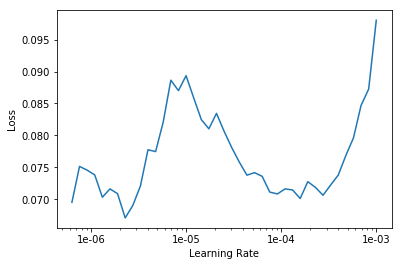

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr = slice(3e-5, 9e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.053314,0.032867,0.014085,01:02
1,0.072359,0.032655,0.010563,01:05
2,0.064147,0.030720,0.007042,01:02
3,0.064045,0.034857,0.010563,01:02


In [0]:
learn.save('stage-7-448-Tr')

In [0]:
learn.fit_one_cycle(4, max_lr = slice(3e-5, 9e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.043574,0.041941,0.017606,01:04
1,0.052873,0.039921,0.014085,01:04
2,0.049824,0.038306,0.021127,01:04
3,0.047076,0.033351,0.021127,01:02


In [0]:
learn.save('stage-8-448-Tr')

In [0]:
learn.fit_one_cycle(4, max_lr = slice(3e-5, 9e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.033532,0.031735,0.021127,01:00
1,0.039535,0.035820,0.007042,01:02
2,0.038238,0.029779,0.010563,01:03
3,0.029659,0.025811,0.010563,01:04


In [0]:
learn.save('stage-9-448-Tr')

In [0]:
learn.fit_one_cycle(4, max_lr = slice(3e-5, 9e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.030229,0.019039,0.010563,01:02
1,0.024896,0.013486,0.007042,01:01
2,0.024211,0.021188,0.010563,01:02
3,0.022996,0.021164,0.010563,01:02


In [0]:
learn.save('stage-10-448-Tr')

In [0]:
learn.freeze()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.025079,0.024723,0.010563,01:01
1,0.016540,0.033792,0.014085,01:01
2,0.022971,0.031383,0.014085,01:01
3,0.020830,0.021882,0.010563,00:59


In [0]:
learn.save('stage-11-448-Tr')

In [0]:
learn.load('stage-11-448-Tr');

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.018938,0.015474,0.996479,01:03
1,0.021688,0.028815,0.992958,01:01
2,0.019329,0.029715,0.989437,01:01
3,0.019821,0.026344,0.989437,01:00


In [0]:
learn.save('stage-12-448-Tr')

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.031383,0.018322,0.989437,01:02
1,0.031571,0.023975,0.992958,00:57
2,0.032039,0.032840,0.985915,01:00
3,0.026644,0.038481,0.985915,01:00


In [0]:
#Best Till Now
learn.save('stage-13-448-Tr')

In [0]:

learn.save('stage-5-448-Tr')

In [0]:
learn.save('stage-3-448')

In [0]:
learn.load('stage-3-448')

## Interpretation

In [0]:
# Using "stage-1" weights for inference
learn.load('stage-13-448-Tr');

In [0]:
path_data = '/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/'

In [0]:
data_test = ImageDataBunch.from_folder(path_data, valid = 'test', ds_tfms=([], []),
                                       size=448, num_workers=4).normalize(imagenet_stats)
data_test

ImageDataBunch;

Train: LabelList (1419 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
500,500,500,500,500
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset;

Valid: LabelList (227 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
10,10,10,10,10
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset;

Test: None

In [0]:
learn.data = data_test

In [0]:
# "interp" object will help analysing the trained model
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
#This shows, the objects which model most confused with.
interp.most_confused()

[('100', 'none', 16),
 ('500', '200', 6),
 ('none', '200', 5),
 ('10', '100', 4),
 ('10', '20', 4),
 ('10', 'none', 4),
 ('100', '10', 4),
 ('50', '500', 4),
 ('500', 'none', 4),
 ('none', '10', 4),
 ('none', '100', 4),
 ('none', '20', 4),
 ('100', '50', 3),
 ('100', '500', 3),
 ('10', '5', 2),
 ('100', '20', 2),
 ('100', '200', 2),
 ('50', 'none', 2),
 ('10', '200', 1),
 ('20', '500', 1),
 ('200', '100', 1),
 ('200', '20', 1),
 ('50', '5', 1)]

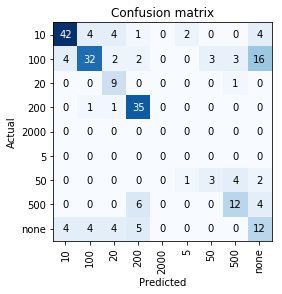

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses(183, heatmap = False, figsize=(40, 24))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
 #Exporting the trained model...
learn.export()